In [5]:
!pip install --user --upgrade pip

!pip install h5py
!pip install keras

Requirement already up-to-date: pip in c:\users\lucas\appdata\roaming\python\python36\site-packages (19.1.1)


In [2]:
import h5py

data_file = h5py.File('data.h5', 'r')

dinput = data_file['dinput']
doutput = data_file['doutput']

dishape = dinput[0].shape

print(dinput.shape)
print(doutput.shape)

data_n = doutput.shape[0]

train_images, train_labels = dinput[:250].copy(), doutput[:250].copy()
test_images, test_labels =  dinput[250:].copy(), doutput[250:].copy()

train_labels = train_labels.reshape((250, doutput.shape[1], doutput.shape[2], 1))
test_labels = test_labels.reshape((data_n - 250, doutput.shape[1], doutput.shape[2], 1))

print(test_labels.shape)

data_file.close()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(497, 240, 320, 3)
(497, 7, 10, 1)
(247, 7, 10, 1)


In [3]:
from keras import backend as K

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

Using TensorFlow backend.


In [4]:
from keras import layers
from keras import models
from keras import backend as K

K.clear_session()

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=dishape, padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=dishape, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.summary()

W0805 00:32:31.483911  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0805 00:32:31.485906  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 00:32:31.510839  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 00:32:31.513851  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 00:32:31.517820  6236 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 240, 320, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 240, 320, 32)      18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 240, 320, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 160, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 160, 32)      18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 120, 160, 32)      128       
__________

In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', recall])
history = model.fit(train_images, train_labels, epochs=30, batch_size=15, validation_data=(test_images, test_labels))

W0805 00:32:32.212353  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 00:32:32.260225  6236 deprecation.py:323] From C:\Users\Lucas\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 250 samples, validate on 247 samples
Epoch 1/30
250/250 [==============================] - 255s 1s/step - loss: 0.3339 - acc: 0.8850 - recall: 0.1056 - val_loss: 1.4346 - val_acc: 0.2376 - val_recall: 0.9758
Epoch 2/30
250/250 [==============================] - 272s 1s/step - loss: 0.1695 - acc: 0.9559 - recall: 0.0582 - val_loss: 2.2316 - val_acc: 0.1680 - val_recall: 0.9931
Epoch 3/30
250/250 [==============================] - 270s 1s/step - loss: 0.1425 - acc: 0.9566 - recall: 0.0968 - val_loss: 0.8299 - val_acc: 0.5895 - val_recall: 0.7250
Epoch 4/30
250/250 [==============================] - 252s 1s/step - loss: 0.1285 - acc: 0.9585 - recall: 0.1664 - val_loss: 0.9651 - val_acc: 0.5193 - val_recall: 0.8643
Epoch 5/30
250/250 [==============================] - 245s 981ms/step - loss: 0.1185 - acc: 0.9583 - recall: 0.2161 - val_loss: 2.0086 - val_acc: 0.2979 - val_recall: 0.9864
Epoch 6/30
250/250 [==============================] - 262s 1s/step - loss: 0.1098 - acc: 0.9599 

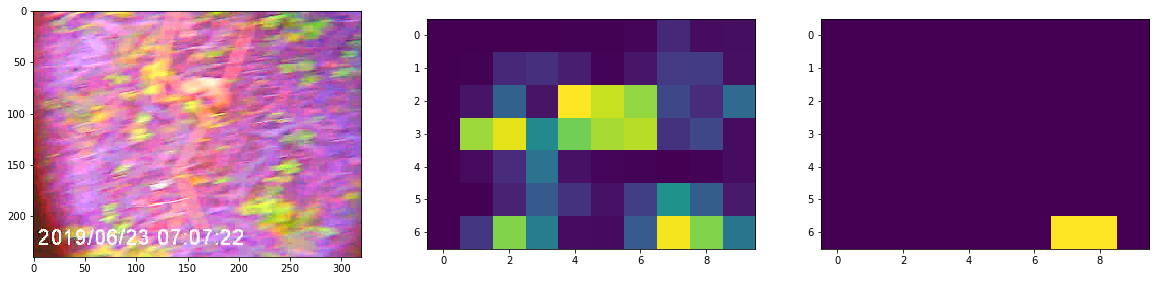

In [11]:
import matplotlib.pyplot as plt

index = 150

result = model.predict(test_images[index:index+1])

#from scipy import signal
#print(signal.correlate2d(result[0][:,:,0], test_labels[index][:,:,0]))

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1)                
plt.imshow(test_images[index])        
fig.add_subplot(1, 3, 2)
rst = result[0][:,:,0]
plt.imshow(rst)
fig.add_subplot(1, 3, 3)
plt.imshow(test_labels[index][:,:,0]);

In [20]:
from scipy import signal


In [6]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>